### Task A2 Linear Regression, on a very small dataset, from scratch with only numpy
#### (illustrating idea of rates of change with respect to the model parameters and gradient descent)

Consider a really small dataset consisting of only three points in the plane: $(1,1),(2,4),(3,5)$.

For each point (training example) consider the $x$-coordinate as a single input feature, and the $y$-coordinate as the output or label of the example. The objective is to find the best line to fit these data. Here 'best' will mean the line which minimises the mean of the sum of the squares of the residuals with respect to the three points.

In this task and in the following tasks A3 and A4 we will use a slightly different convention to store our data with respect to the one used in A1 or the lectures. $X_{\text{train}}$ and $y_{\text{train}}$ will now be the transpose of the corresponding matrices in A1. In A3 and A4 this will be a more convenient form for applying functions given by matrices to the data with the matrix on the left of the data matrix.

The feature matrix $X_{\text{train}}$ contains the feature vectors for all the training examples. More precisely $X_{\text{train}}= \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} $ has one column for each training example and each column is the feature vector for that training example (in this case we have only one feature which is the $x$-coordinate).

The labels matrix $y_{\text{train}}$ contains the labels for all the training examples. More precisely $y_{\text{train}} = \begin{pmatrix} 1 & 4 & 5\end{pmatrix}$ has one column for each training example and each column contains the label for that training example (the $y$-coordinate).

The model here is a simple linear model

$$
\hat y = mx +c
$$

with trainable parameters $m$ and $c$. The goal is to find the optimal values of $m$ and $c$ to fit these training data. In the Machine Learning context this means defining a loss function between prediction and true label:

$$
L(\hat y, y)=(\hat y - y)^2
$$

and a cost function which is simply the average on all training examples of these losses.

**Specifically, you should**

1. Show, in a markdown cell, how the cost $J$ depends only on the trainable parameters $m$ and $c$, and can be computed to be:
$$ J=\displaystyle\frac{14m^2+12cm-48m+3c^2-20c+42}{3}$$

2. Find, in a markdown cell, expressions for the partial derivatives $\displaystyle\frac{\partial J}{\partial m}$ and $\displaystyle\frac{\partial J}{\partial c}$.
3. Write a function `model1(alpha, num_iterations)` which takes as inputs a  learning rate `alpha` and a number of iterations `num_iterations`, and returns optimized values of $m$ and $c$ through Gradient Descent. More precisely the function should initialize $m$ and $c$ randomly between $-2$ and $2$ and then perform `num_iterations` steps of gradient descent with learning rate `alpha`. This means that the value of $m$ is updated to $m - \displaystyle\frac{\partial J}{\partial m}\alpha$ and the value of $c$ is updated to $c - \displaystyle\frac{\partial J}{\partial c}\alpha$ in each iteration.
Your function should print the cost $J$ periodically throughout the iteration process. You may wish to refer to the Machine learning project lecture for help with this. You may wish to build helper functions for the various tasks you need this function to do and refer to them.
4. Plot the 3 datapoints along with the optimal line $mx+c$ your model has found.
5. Explore the effect of changing the learning rate and the number of iterations.

*Insert code and markdown cells here in which to answer this task*

#### 1)
Let J denote the cost, then: 
$$ J=\displaystyle\frac{L(\hat y_1, 1)+L(\hat y_2, 4)+L(\hat y_3, 5)}{3} $$

$$ J=\displaystyle\frac{(\hat y_1-1)^2+(\hat y_2-4)^2+(\hat y_3-5)^2}{3} $$

given $ \hat y_1=m+c, \hat y_2=2m+c,$ and $ \hat y_3=3m+c $ we can rewrite this as:

$$ J=\displaystyle\frac{(m+c-1)^2+(2m+c-4)^2+(3m+c-5)^2}{3} $$

$$J=\displaystyle\frac{(m^2+c^2+2cm-2m-2c+1)+(4m^2+c^2+4cm-16m-8m+16)+(9m^2+c^2+6cm-30m-10c+25)}{3}$$

$$ J=\displaystyle\frac{14m^2+12cm-48m+3c^2-20c+42}{3} $$

Hence J depends only on $m$ and $c$.

___

#### 2)
Taking the partial derivative of $J$ with respect to $m$, we get:

$$\displaystyle\frac{\partial J}{\partial m} = \displaystyle\frac{28m+12c-48}{3}$$

and taking the partial derivative of $J$ with respect to $c$, we find:

$$\displaystyle\frac{\partial J}{\partial c} = \displaystyle\frac{12m+6c-48}{3}$$

Cost after iteration 0: 3.315736
Cost after iteration 500: 0.222222
Cost after iteration 1000: 0.222222
Cost after iteration 1500: 0.222222
Cost after iteration 2000: 0.222222
Cost after iteration 2500: 0.222222
Cost after iteration 3000: 0.222222
Cost after iteration 3500: 0.222222
Cost after iteration 4000: 0.222222
Cost after iteration 4500: 0.222222
Cost after iteration 5000: 0.222222
Cost after iteration 5500: 0.222222
Cost after iteration 6000: 0.222222
Cost after iteration 6500: 0.222222
Cost after iteration 7000: 0.222222
Cost after iteration 7500: 0.222222
Cost after iteration 8000: 0.222222
Cost after iteration 8500: 0.222222
Cost after iteration 9000: 0.222222
Cost after iteration 9500: 0.222222


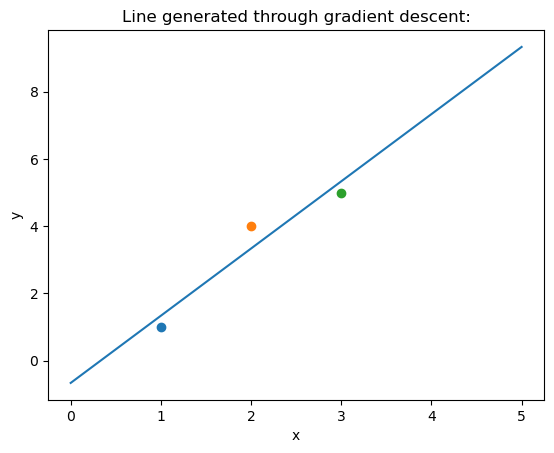

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

def model1(alpha, num_iterations):
    """
    Arguments:
    alpha -- float, learning rate
    num_iterations -- integer, number of iterations in gradient descent loop
    
    Returns:
    m,c -- tuple, containg optimised m,c as found by gradient descent
    """
    # Randomly choose inital values for m and c
    m,c = np.random.uniform(-2,2,2)
    
    for i in range(num_iterations):
    
        # Update m & c
        new_m = m -((1/3)*(28*m + 12*c - 48))*alpha 
        new_c = c -((1/3)*(12*m + 6*c - 20))*alpha
        
        # Calculate cost
        J = (1/3)*(14*m**2 + 12*c*m - 48*m + 3*c**2 -20*c + 42)
        
        # Periodically print cost every 500 iterations
        if i % 500 == 0:
            print("Cost after iteration %i: %f" %(i, J))
        
        # Reassign m & c for next iteration
        m, c = new_m, new_c
    
    # Return optimised m & c
    return m, c

m,c = model1(0.15, 10000)

# Generating points for line, with m & c found through gradient descent
x = np.linspace(0,5,2)
y = m*x + c

# Plotting data points against line and producing a graph
plt.plot(x,y)
plt.title("Line generated through gradient descent:")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(1,1)
plt.scatter(2,4)
plt.scatter(3,5)
plt.show()

Investigating the effect of varying learning rate $\alpha$ and number of iterations:

For $\alpha > 0.19$, the cost would fail to converge and rapidly increase and above 3500 iterations the programme was unable to represent the value of the cost $J$. For $ 0.01 < \alpha < 0.19 $ $J$ would converge to $0.222222$ within 3000 iterations returning optimised values of $m \approx 2,c \approx -2/3$. 

$\alpha \approx 0.15$ gave the fastest rate of convergence, converging after just over 200 iterations.